In [1]:
import keras
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
# %reload_ext mermaid
# import IPython
# IPython.load_ipython_extensions(["nb-mermaid/nb-mermaid"]);

Using TensorFlow backend.


In [2]:
import tensorflow  as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, Input, Flatten, Lambda
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adadelta, SGD, Adam
from keras.utils import to_categorical
import keras.backend as K

In [3]:
tf_config = tf.ConfigProto(allow_soft_placement=False)
tf_config.gpu_options.allow_growth = True
s = tf.Session(config=tf_config)
K.set_session(s)

In [4]:
csv_data = pd.read_csv('AND_Features.csv')
display(csv_data.head()), display(csv_data.shape)
image_path = 'cleaned_AND_data_64x64/'
images = os.listdir(image_path)
print(len(images))
images = pd.DataFrame(np.array(images), columns=['image'])
print(images.shape)
# csv_data[csv_data['ImageId']=='0359a']

,Unnamed: 0,ImageId,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,0,0359a,2,1,1,0,2,2,0,2,2


In [9]:
list(images[images['image'].str.match('1120')]['image'])

['1120a_num1.png',
 '1120b_num5.png',
 '1120c_num5.png',
 '1120c_num2.png',
 '1120b_num1.png',
 '1120c_num4.png',
 '1120b_num3.png',
 '1120c_num1.png',
 '1120c_num3.png',
 '1120a_num2.png',
 '1120b_num4.png',
 '1120b_num2.png']

In [10]:
len(list(set(list(x[:4] for x in images['image'])))), len(list(set(list(x[:4] for x in csv_data['ImageId']))))

(1532, 462)

In [11]:
dataset_columns = csv_data.columns
display(csv_data.head(20))
csv_data.shape

,Unnamed: 0,ImageId,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,0,0359a,2,1,1,0,2,2,0,2,2
1,1,0577a,2,1,1,0,2,2,0,1,2
2,2,1120a,2,1,1,3,2,2,0,2,2
3,3,1120b,1,1,1,0,2,2,0,2,2
4,4,1120c,2,1,1,0,2,2,0,0,2
5,5,1121a,2,1,1,3,2,2,0,1,2
6,6,1121b,2,1,1,0,2,2,0,3,2
7,7,1121c,1,1,1,0,2,2,0,1,2
8,8,1229b,1,1,1,3,2,2,0,2,2
9,9,1302a,2,1,1,3,2,2,0,0,2


(1026, 11)

In [12]:
train_csv_data =  csv_data[:700]
val_csv_data =  csv_data[700:]
train_csv_data.shape, val_csv_data.shape

((700, 11), (326, 11))

In [13]:
f = []
for col in dataset_columns[2:]:
    f.append(csv_data[col].unique().shape[0])
f

[4, 5, 3, 5, 4, 4, 4, 5, 2]

In [14]:

# model = Sequential()
input_layer = Input((64,64,1))
model = BatchNormalization()(input_layer)

model = Conv2D(activation='relu',filters=32, kernel_size=(3,3), padding='same')(model)
model = Conv2D(activation='relu',filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(model)
# model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(3,3), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(3,3), strides=(2,2), padding='same')(model)
# model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(3,3), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(3,3), strides=(2,2), padding='same')(model)
# model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)
# model = Flatten()(model)

dense_layer = Dense(512, activation='relu')(model)
dense_layer = Dropout(0.5)(dense_layer)
dense_layer_1 = Dense(64 , activation='relu', name = 'dense_layer_1')(dense_layer)
dense_layer_1 = Flatten()(dense_layer_1)
dense_layer_2 = Dense(64 , activation='relu', name = 'dense_layer_2')(dense_layer)
dense_layer_2 = Flatten()(dense_layer_2)
dense_layer_3 = Dense(64 , activation='relu', name = 'dense_layer_3')(dense_layer)
dense_layer_3 = Flatten()(dense_layer_3)
dense_layer_4 = Dense(64 , activation='relu', name = 'dense_layer_4')(dense_layer)
dense_layer_4 = Flatten()(dense_layer_4)
dense_layer_5 = Dense(64 , activation='relu', name = 'dense_layer_5')(dense_layer)
dense_layer_5 = Flatten()(dense_layer_5)
dense_layer_6 = Dense(64 , activation='relu', name = 'dense_layer_6')(dense_layer)
dense_layer_6 = Flatten()(dense_layer_6)
dense_layer_7 = Dense(64 , activation='relu', name = 'dense_layer_7')(dense_layer)
dense_layer_7 = Flatten()(dense_layer_7)
dense_layer_8 = Dense(64 , activation='relu', name = 'dense_layer_8')(dense_layer)
dense_layer_8 = Flatten()(dense_layer_8)


out_feature_1 = Dense(f[0] , activation='softmax', name = 'out_feature_1')(dense_layer_1)
out_feature_2 = Dense(f[1] , activation='softmax', name = 'out_feature_2')(dense_layer_2)
out_feature_3 = Dense(f[2] , activation='softmax', name = 'out_feature_3')(dense_layer_3)
out_feature_4 = Dense(f[3] , activation='softmax', name = 'out_feature_4')(dense_layer_4)
out_feature_5 = Dense(f[4] , activation='softmax', name = 'out_feature_5')(dense_layer_5)
out_feature_6 = Dense(f[5] , activation='softmax', name = 'out_feature_6')(dense_layer_6)
out_feature_7 = Dense(f[6] , activation='softmax', name = 'out_feature_7')(dense_layer_7)
out_feature_8 = Dense(f[7] , activation='softmax', name = 'out_feature_8')(dense_layer_8)

# out_feature = []
# counter = 1
# for f_layer in f[:8]:
#     dense_layer = Dense(f_layer , activation='softmax', name = 'out_feature_'+str(counter))(dense_layer)
#     out_feature.append(Dense(f_layer , activation='softmax', name = 'out_feature_'+str(counter))(dense_layer))
#     counter += 1
# model = Dense()(model)
human_features = Model(inputs=[input_layer], outputs=[out_feature_1,out_feature_2,out_feature_3,out_feature_4,out_feature_5,out_feature_6,out_feature_7,out_feature_8])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 

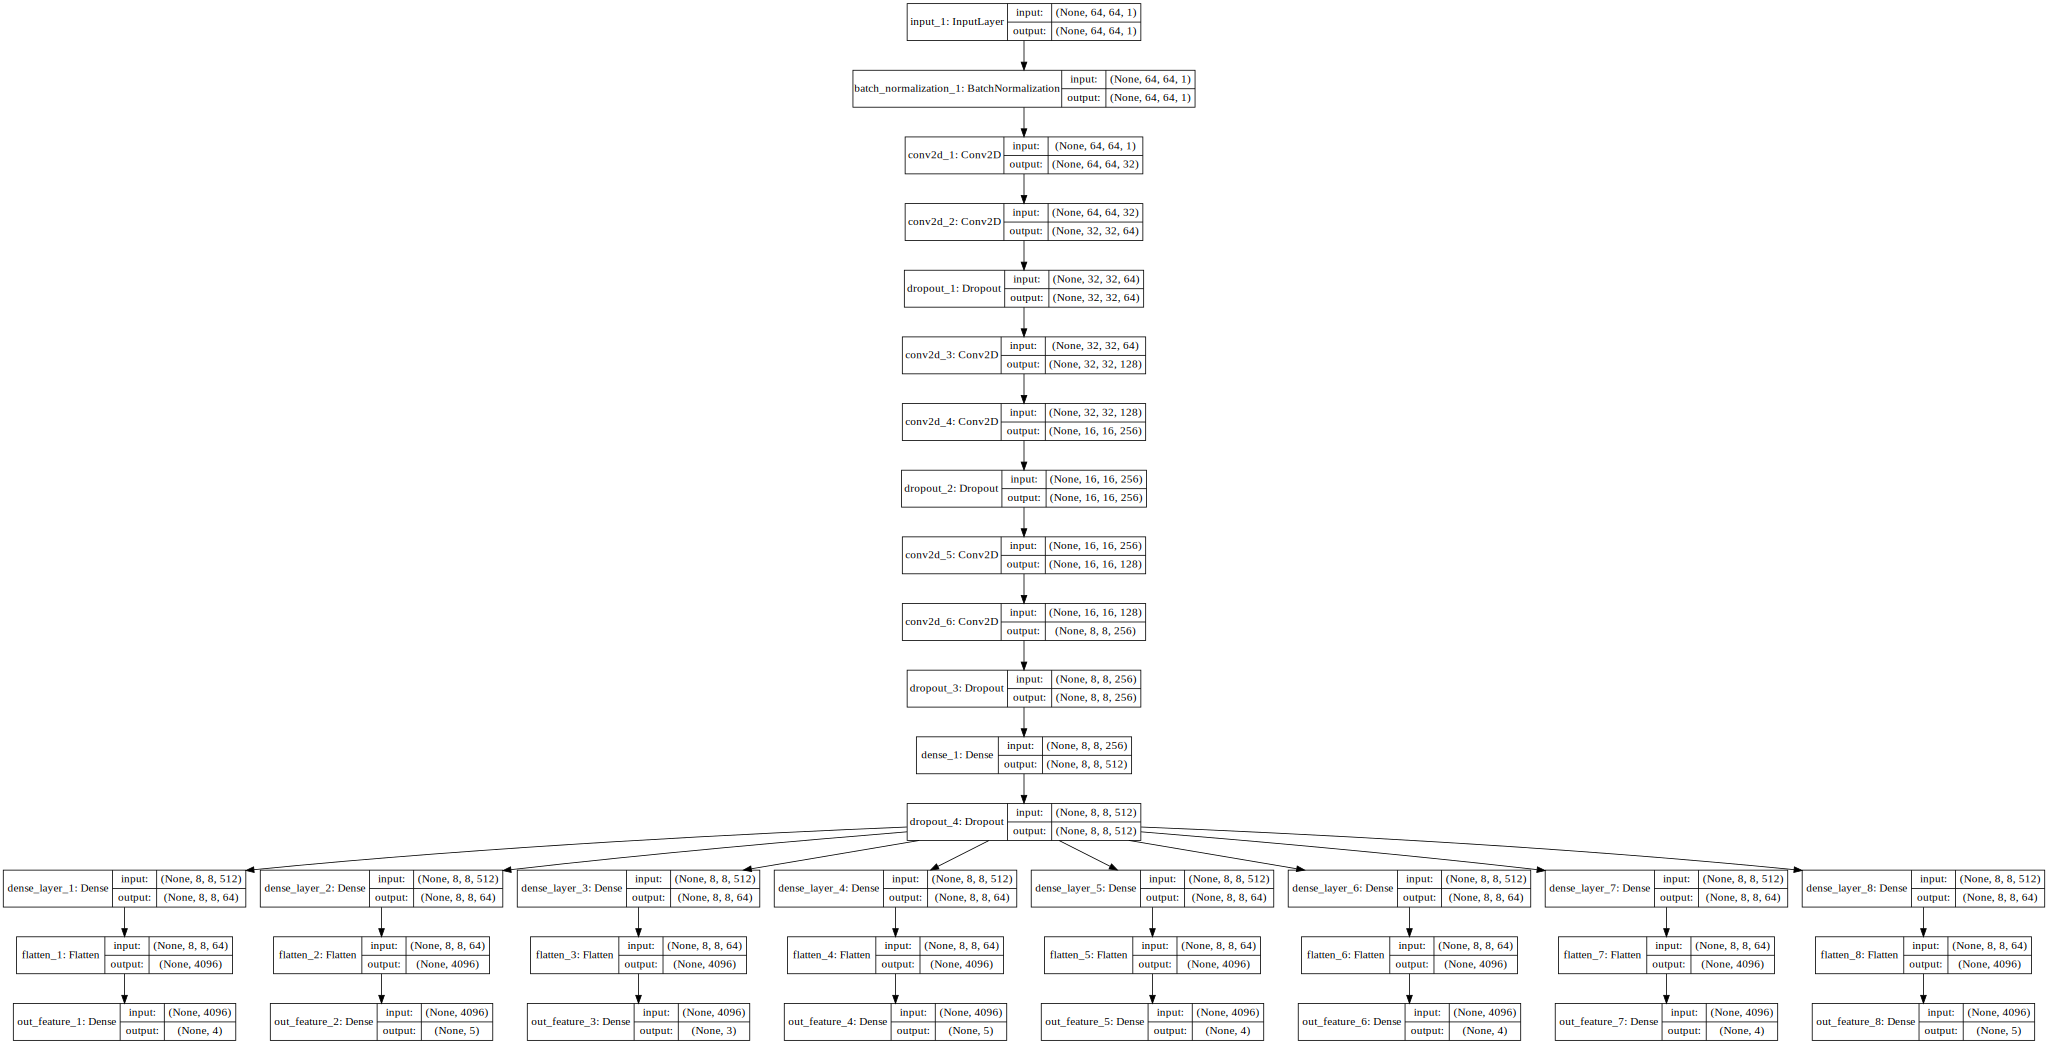

In [15]:
SVG(model_to_dot(human_features, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
feature_lengths = {}
for col in dataset_columns[2:10]:
    feature_lengths[col] = len(csv_data[col].unique())
feature_lengths

{'f1': 4, 'f2': 5, 'f3': 3, 'f4': 5, 'f5': 4, 'f6': 4, 'f7': 4, 'f8': 5}

In [17]:
# df_data[df_data['f8']==2]

In [18]:
im = images[images['image'].str.match('1229b')]
im.iloc[0]['image']

'1229b_num2.png'

In [19]:

# stop_at = 20
# identitycounter = 1
# unique_writers = list(set(list(x[:4] for x in df_data['ImageId'])))
# for writer in unique_writers:
#     print(identitycounter*100/stop_at, end='\r')
#     writer_samples = list(images[images['image'].str.match(writer)]['image'])
# #     print('lne',len(writer_samples))
#     f,ax = plt.subplots(1,len(writer_samples))
#     f.subplots_adjust(hspace = .5, wspace=.15)
#     f.set_size_inches(15,15)
#     imgcounter = 0
#     for sample in writer_samples:
#         imagepath = os.path.join(image_path,sample)
#         raw_img = cv2.imread(imagepath)
#         if len(writer_samples)>1:
#             ax[imgcounter].imshow(raw_img)
#             ax[imgcounter].set_title(writer+'\n'+sample)
#         else:
#             ax.imshow(raw_img)
#             ax.set_title(writer+'\n'+sample)
# #         ax[imgcounter].axis('off')
#         imgcounter+=1
#         if imgcounter == stop_at:
#             break
#     imgcounter=0
#     identitycounter += 1
#     if identitycounter == stop_at+1:
#         break

In [20]:
csv_data[csv_data['ImageId'].str.match('1302c')]

,Unnamed: 0,ImageId,f1,f2,f3,f4,f5,f6,f7,f8,f9
11,11,1302c,2,1,1,3,2,2,0,3,2


In [21]:

def datagen(batch_size,list_of_writers):
    counter = 0
    
    
    while counter <= batch_size:
        counter = 0
        # for writer in unique_writers:
        #     print(identitycounter*100/stop_at, end='\r')
        writer_indexes = np.random.randint(0,len(list_of_writers),batch_size)
        x,f_1_out,f_2_out,f_3_out,f_4_out,f_5_out,f_6_out,f_7_out,f_8_out = [],[],[],[],[],[],[],[],[]
        for writer_index in writer_indexes:
#             class_vectors = []
            writer = list_of_writers[writer_index]
#             print(writer)
            writer_samples = list(images[images['image'].str.match(writer)]['image'])
#             print('writer:',writer,', writer_samples:',writer_samples)
            if len(writer_samples) == 0:
                continue
            writer_sample_index = np.random.randint(0,len(writer_samples))

            #     unique_writers_count[writer] = len(writer_samples)
#             print('writer_sample_index:',writer_sample_index)
            csv_writer = writer_samples[writer_sample_index][:5]

    
            loaded_image = cv2.imread(os.path.join(image_path,writer_samples[writer_sample_index]),0)
            loaded_image = np.expand_dims(loaded_image,-1)
#             print('csv_writer:', csv_writer, ', writer:', writer)
#             display(csv_data[csv_data['ImageId'].str.match(csv_writer)])
            csv_discreete_features = csv_data[csv_data['ImageId'].str.match(csv_writer)].iloc[0].values[2:]
#             print(csv_writer, writer_samples[writer_sample_index])
#             print(csv_writer,csv_discreete_features)
#             for i in range(1,9):
#                 print(csv_discreete_features[i-1],end=',')
            f_1_out.append(csv_discreete_features[0])
            f_2_out.append(csv_discreete_features[1])
            f_3_out.append(csv_discreete_features[2])
            f_4_out.append(csv_discreete_features[3])
            f_5_out.append(csv_discreete_features[4])
            f_6_out.append(csv_discreete_features[5])
            f_7_out.append(csv_discreete_features[6])
            f_8_out.append(csv_discreete_features[7])
#                 class_vectors.append(to_categorical(csv_discreete_features[i-1],num_classes=feature_lengths['f'+str(i)]))
#             print("\n",len(class_vectors))
#             print('\n-----------')
            
#             print("++++++++++++++++++++++[",counter,"]+++++++++++++++++++++++")
        #     imgcounter = 0
        #     for sample in writer_samples:
        #         imagepath = os.path.join(image_path,sample)
        #         raw_img = cv2.imread(imagepath)
        #         imgcounter+=1
        #     imgcounter=0
        #     identitycounter += 1
            x.append(255.0-loaded_image)
            
            
            counter+=1
#             print('counter:', counter, end='\r')
        yield np.array(x)/255.0, [to_categorical(f_1_out,num_classes=feature_lengths['f1']) \
                            , to_categorical(f_2_out,num_classes=feature_lengths['f2']) \
                            , to_categorical(f_3_out,num_classes=feature_lengths['f3']) \
                            , to_categorical(f_4_out,num_classes=feature_lengths['f4']) \
                            , to_categorical(f_5_out,num_classes=feature_lengths['f5']) \
                            , to_categorical(f_6_out,num_classes=feature_lengths['f6']) \
                            , to_categorical(f_7_out,num_classes=feature_lengths['f7']) \
                            , to_categorical(f_8_out,num_classes=feature_lengths['f8'])]
                    

In [22]:
# # unique_writers_count
# f_count = {}
train_list_of_writers = train_csv_data['ImageId'].unique()
val_list_of_writers = val_csv_data['ImageId'].unique()
batch_size = 64

tg = datagen(batch_size,train_list_of_writers)
vg = datagen(batch_size,val_list_of_writers)


In [23]:
# images
inputs,o = next(tg)
inputs[0].shape, o[0].shape, o[1].shape,o[2].shape,o[3].shape,o[4].shape,o[5].shape,o[6].shape,o[7].shape

((64, 64, 1),
 (64, 4),
 (64, 5),
 (64, 3),
 (64, 5),
 (64, 4),
 (64, 4),
 (64, 4),
 (64, 5))

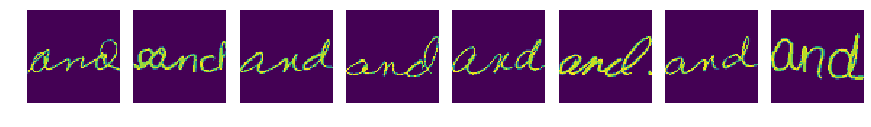

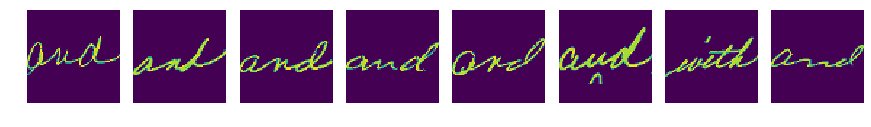

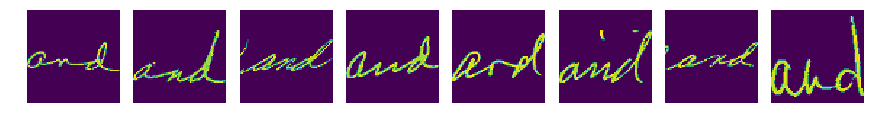

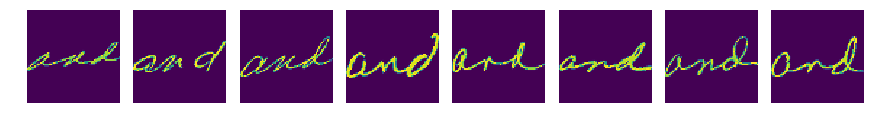

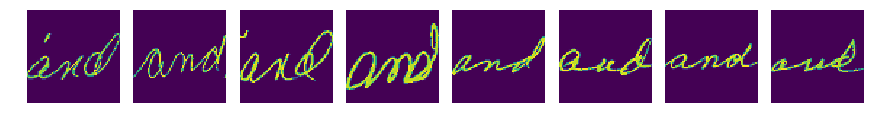

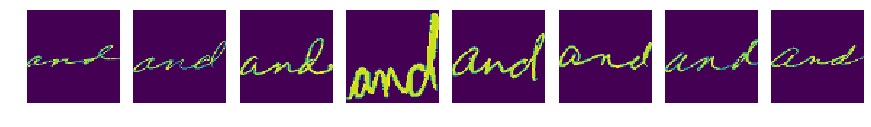

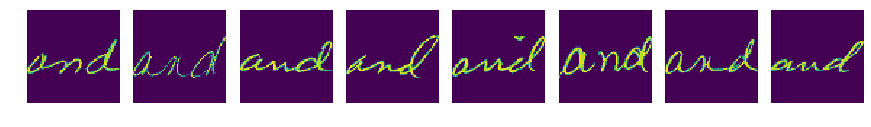

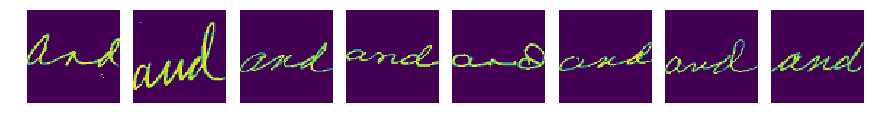

In [24]:
for r in range(8):
    f,ax = plt.subplots(1,8)
    f.subplots_adjust(hspace = .00, wspace=.15)
    f.set_size_inches(15,5)
    for c in range (8):
        ax[c].imshow(inputs[c+r*8].reshape((64,64)))
        ax[c].axis('off')

In [25]:
losses = {}
lossWeights = {}
for i in range(1,9):
    losses["out_feature_"+str(i)] = "categorical_crossentropy"
    lossWeights["out_feature_"+str(i)] = 1.0
# lossWeights["out_feature_1"] = 10.0
# lossWeights["out_feature_2"] = 8.0
# lossWeights["out_feature_3"] = 0.1
# lossWeights["out_feature_4"] = 8.0
# lossWeights["out_feature_5"] = 1.0
# lossWeights["out_feature_6"] = 5.0
# lossWeights["out_feature_7"] = 5.0
# lossWeights["out_feature_8"] = 10.0


In [26]:
mc = ModelCheckpoint(filepath='human_features_weights_v2.h5', monitor='val_loss',period=1,save_best_only=True,save_weights_only=True,mode='auto',verbose=3)
es = EarlyStopping(patience=1000, monitor='val_loss', min_delta=0.0005, mode='auto')

In [36]:
EPOCHS = 5000
INIT_LR = 0.0001
# opt = SGD(lr=INIT_LR, decay=1e-6, momentum=0.95, nesterov=True)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt = Adadelta(lr=INIT_LR, decay=1e-04)

# feat_extractor.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])


human_features.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 

In [37]:

hist = human_features.fit_generator(tg, callbacks=[mc,es]
                                    , epochs=EPOCHS
                                    , steps_per_epoch = 1
                                    , validation_data = vg
                                    , validation_steps = 1
                                    , verbose = 3
                                    
                                   )

Epoch 1/5000

Epoch 00001: val_loss did not improve from 10.69891
Epoch 2/5000

Epoch 00002: val_loss did not improve from 10.69891
Epoch 3/5000

Epoch 00003: val_loss did not improve from 10.69891
Epoch 4/5000

Epoch 00004: val_loss did not improve from 10.69891
Epoch 5/5000

Epoch 00005: val_loss did not improve from 10.69891
Epoch 6/5000

Epoch 00006: val_loss did not improve from 10.69891
Epoch 7/5000

Epoch 00007: val_loss did not improve from 10.69891
Epoch 8/5000

Epoch 00008: val_loss did not improve from 10.69891
Epoch 9/5000

Epoch 00009: val_loss did not improve from 10.69891
Epoch 10/5000

Epoch 00010: val_loss did not improve from 10.69891
Epoch 11/5000

Epoch 00011: val_loss did not improve from 10.69891
Epoch 12/5000

Epoch 00012: val_loss did not improve from 10.69891
Epoch 13/5000

Epoch 00013: val_loss did not improve from 10.69891
Epoch 14/5000

Epoch 00014: val_loss did not improve from 10.69891
Epoch 15/5000

Epoch 00015: val_loss did not improve from 10.69891
Epoc


Epoch 00123: val_loss did not improve from 10.69891
Epoch 124/5000

Epoch 00124: val_loss did not improve from 10.69891
Epoch 125/5000

Epoch 00125: val_loss did not improve from 10.69891
Epoch 126/5000

Epoch 00126: val_loss did not improve from 10.69891
Epoch 127/5000

Epoch 00127: val_loss did not improve from 10.69891
Epoch 128/5000

Epoch 00128: val_loss did not improve from 10.69891
Epoch 129/5000

Epoch 00129: val_loss did not improve from 10.69891
Epoch 130/5000

Epoch 00130: val_loss did not improve from 10.69891
Epoch 131/5000

Epoch 00131: val_loss did not improve from 10.69891
Epoch 132/5000

Epoch 00132: val_loss did not improve from 10.69891
Epoch 133/5000

Epoch 00133: val_loss did not improve from 10.69891
Epoch 134/5000

Epoch 00134: val_loss did not improve from 10.69891
Epoch 135/5000

Epoch 00135: val_loss did not improve from 10.69891
Epoch 136/5000

Epoch 00136: val_loss did not improve from 10.69891
Epoch 137/5000

Epoch 00137: val_loss did not improve from 10.6


Epoch 00244: val_loss did not improve from 10.69891
Epoch 245/5000

Epoch 00245: val_loss did not improve from 10.69891
Epoch 246/5000

Epoch 00246: val_loss did not improve from 10.69891
Epoch 247/5000

Epoch 00247: val_loss did not improve from 10.69891
Epoch 248/5000

Epoch 00248: val_loss did not improve from 10.69891
Epoch 249/5000

Epoch 00249: val_loss did not improve from 10.69891
Epoch 250/5000

Epoch 00250: val_loss did not improve from 10.69891
Epoch 251/5000

Epoch 00251: val_loss did not improve from 10.69891
Epoch 252/5000

Epoch 00252: val_loss did not improve from 10.69891
Epoch 253/5000

Epoch 00253: val_loss did not improve from 10.69891
Epoch 254/5000

Epoch 00254: val_loss did not improve from 10.69891
Epoch 255/5000

Epoch 00255: val_loss did not improve from 10.69891
Epoch 256/5000

Epoch 00256: val_loss did not improve from 10.69891
Epoch 257/5000

Epoch 00257: val_loss did not improve from 10.69891
Epoch 258/5000

Epoch 00258: val_loss did not improve from 10.6


Epoch 00365: val_loss did not improve from 10.69891
Epoch 366/5000

Epoch 00366: val_loss did not improve from 10.69891
Epoch 367/5000

Epoch 00367: val_loss did not improve from 10.69891
Epoch 368/5000

Epoch 00368: val_loss did not improve from 10.69891
Epoch 369/5000

Epoch 00369: val_loss did not improve from 10.69891
Epoch 370/5000

Epoch 00370: val_loss did not improve from 10.69891
Epoch 371/5000

Epoch 00371: val_loss did not improve from 10.69891
Epoch 372/5000

Epoch 00372: val_loss did not improve from 10.69891
Epoch 373/5000

Epoch 00373: val_loss did not improve from 10.69891
Epoch 374/5000

Epoch 00374: val_loss did not improve from 10.69891
Epoch 375/5000

Epoch 00375: val_loss did not improve from 10.69891
Epoch 376/5000

Epoch 00376: val_loss did not improve from 10.69891
Epoch 377/5000

Epoch 00377: val_loss did not improve from 10.69891
Epoch 378/5000

Epoch 00378: val_loss did not improve from 10.69891
Epoch 379/5000

Epoch 00379: val_loss did not improve from 10.6


Epoch 00486: val_loss did not improve from 10.69891
Epoch 487/5000

Epoch 00487: val_loss did not improve from 10.69891
Epoch 488/5000

Epoch 00488: val_loss did not improve from 10.69891
Epoch 489/5000

Epoch 00489: val_loss did not improve from 10.69891
Epoch 490/5000

Epoch 00490: val_loss did not improve from 10.69891
Epoch 491/5000

Epoch 00491: val_loss did not improve from 10.69891
Epoch 492/5000

Epoch 00492: val_loss did not improve from 10.69891
Epoch 493/5000

Epoch 00493: val_loss did not improve from 10.69891
Epoch 494/5000

Epoch 00494: val_loss did not improve from 10.69891
Epoch 495/5000

Epoch 00495: val_loss did not improve from 10.69891
Epoch 496/5000

Epoch 00496: val_loss did not improve from 10.69891
Epoch 497/5000

Epoch 00497: val_loss did not improve from 10.69891
Epoch 498/5000

Epoch 00498: val_loss did not improve from 10.69891
Epoch 499/5000

Epoch 00499: val_loss did not improve from 10.69891
Epoch 500/5000

Epoch 00500: val_loss did not improve from 10.6


Epoch 00607: val_loss did not improve from 10.69891
Epoch 608/5000

Epoch 00608: val_loss did not improve from 10.69891
Epoch 609/5000

Epoch 00609: val_loss did not improve from 10.69891
Epoch 610/5000

Epoch 00610: val_loss did not improve from 10.69891
Epoch 611/5000

Epoch 00611: val_loss did not improve from 10.69891
Epoch 612/5000

Epoch 00612: val_loss did not improve from 10.69891
Epoch 613/5000

Epoch 00613: val_loss did not improve from 10.69891
Epoch 614/5000

Epoch 00614: val_loss did not improve from 10.69891
Epoch 615/5000

Epoch 00615: val_loss did not improve from 10.69891
Epoch 616/5000

Epoch 00616: val_loss did not improve from 10.69891
Epoch 617/5000

Epoch 00617: val_loss did not improve from 10.69891
Epoch 618/5000

Epoch 00618: val_loss did not improve from 10.69891
Epoch 619/5000

Epoch 00619: val_loss did not improve from 10.69891
Epoch 620/5000

Epoch 00620: val_loss did not improve from 10.69891
Epoch 621/5000

Epoch 00621: val_loss did not improve from 10.6


Epoch 00728: val_loss did not improve from 10.69891
Epoch 729/5000

Epoch 00729: val_loss did not improve from 10.69891
Epoch 730/5000

Epoch 00730: val_loss did not improve from 10.69891
Epoch 731/5000

Epoch 00731: val_loss did not improve from 10.69891
Epoch 732/5000

Epoch 00732: val_loss did not improve from 10.69891
Epoch 733/5000

Epoch 00733: val_loss did not improve from 10.69891
Epoch 734/5000

Epoch 00734: val_loss did not improve from 10.69891
Epoch 735/5000

Epoch 00735: val_loss did not improve from 10.69891
Epoch 736/5000

Epoch 00736: val_loss did not improve from 10.69891
Epoch 737/5000

Epoch 00737: val_loss did not improve from 10.69891
Epoch 738/5000

Epoch 00738: val_loss did not improve from 10.69891
Epoch 739/5000

Epoch 00739: val_loss did not improve from 10.69891
Epoch 740/5000

Epoch 00740: val_loss did not improve from 10.69891
Epoch 741/5000

Epoch 00741: val_loss did not improve from 10.69891
Epoch 742/5000

Epoch 00742: val_loss did not improve from 10.6


Epoch 00849: val_loss did not improve from 10.69891
Epoch 850/5000

Epoch 00850: val_loss did not improve from 10.69891
Epoch 851/5000

Epoch 00851: val_loss did not improve from 10.69891
Epoch 852/5000

Epoch 00852: val_loss did not improve from 10.69891
Epoch 853/5000

Epoch 00853: val_loss did not improve from 10.69891
Epoch 854/5000

Epoch 00854: val_loss did not improve from 10.69891
Epoch 855/5000

Epoch 00855: val_loss did not improve from 10.69891
Epoch 856/5000

Epoch 00856: val_loss did not improve from 10.69891
Epoch 857/5000

Epoch 00857: val_loss did not improve from 10.69891
Epoch 858/5000

Epoch 00858: val_loss did not improve from 10.69891
Epoch 859/5000

Epoch 00859: val_loss did not improve from 10.69891
Epoch 860/5000

Epoch 00860: val_loss did not improve from 10.69891
Epoch 861/5000

Epoch 00861: val_loss did not improve from 10.69891
Epoch 862/5000

Epoch 00862: val_loss did not improve from 10.69891
Epoch 863/5000

Epoch 00863: val_loss did not improve from 10.6


Epoch 00970: val_loss did not improve from 10.69891
Epoch 971/5000

Epoch 00971: val_loss did not improve from 10.69891
Epoch 972/5000

Epoch 00972: val_loss did not improve from 10.69891
Epoch 973/5000

Epoch 00973: val_loss did not improve from 10.69891
Epoch 974/5000

Epoch 00974: val_loss did not improve from 10.69891
Epoch 975/5000

Epoch 00975: val_loss did not improve from 10.69891
Epoch 976/5000

Epoch 00976: val_loss did not improve from 10.69891
Epoch 977/5000

Epoch 00977: val_loss did not improve from 10.69891
Epoch 978/5000

Epoch 00978: val_loss did not improve from 10.69891
Epoch 979/5000

Epoch 00979: val_loss did not improve from 10.69891
Epoch 980/5000

Epoch 00980: val_loss did not improve from 10.69891
Epoch 981/5000

Epoch 00981: val_loss did not improve from 10.69891
Epoch 982/5000

Epoch 00982: val_loss did not improve from 10.69891
Epoch 983/5000

Epoch 00983: val_loss did not improve from 10.69891
Epoch 984/5000

Epoch 00984: val_loss did not improve from 10.6


Epoch 01090: val_loss did not improve from 10.69891
Epoch 1091/5000

Epoch 01091: val_loss did not improve from 10.69891
Epoch 1092/5000

Epoch 01092: val_loss did not improve from 10.69891
Epoch 1093/5000

Epoch 01093: val_loss did not improve from 10.69891
Epoch 1094/5000

Epoch 01094: val_loss did not improve from 10.69891
Epoch 1095/5000

Epoch 01095: val_loss did not improve from 10.69891
Epoch 1096/5000

Epoch 01096: val_loss did not improve from 10.69891
Epoch 1097/5000

Epoch 01097: val_loss did not improve from 10.69891
Epoch 1098/5000

Epoch 01098: val_loss did not improve from 10.69891
Epoch 1099/5000

Epoch 01099: val_loss did not improve from 10.69891
Epoch 1100/5000

Epoch 01100: val_loss did not improve from 10.69891
Epoch 1101/5000

Epoch 01101: val_loss did not improve from 10.69891
Epoch 1102/5000

Epoch 01102: val_loss did not improve from 10.69891
Epoch 1103/5000

Epoch 01103: val_loss did not improve from 10.69891
Epoch 1104/5000

Epoch 01104: val_loss did not imp

11.073823928833008


,val_loss,val_out_feature_1_loss,val_out_feature_2_loss,val_out_feature_3_loss,val_out_feature_4_loss,val_out_feature_5_loss,val_out_feature_6_loss,val_out_feature_7_loss,val_out_feature_8_loss,val_out_feature_1_acc,...,out_feature_7_loss,out_feature_8_loss,out_feature_1_acc,out_feature_2_acc,out_feature_3_acc,out_feature_4_acc,out_feature_5_acc,out_feature_6_acc,out_feature_7_acc,out_feature_8_acc


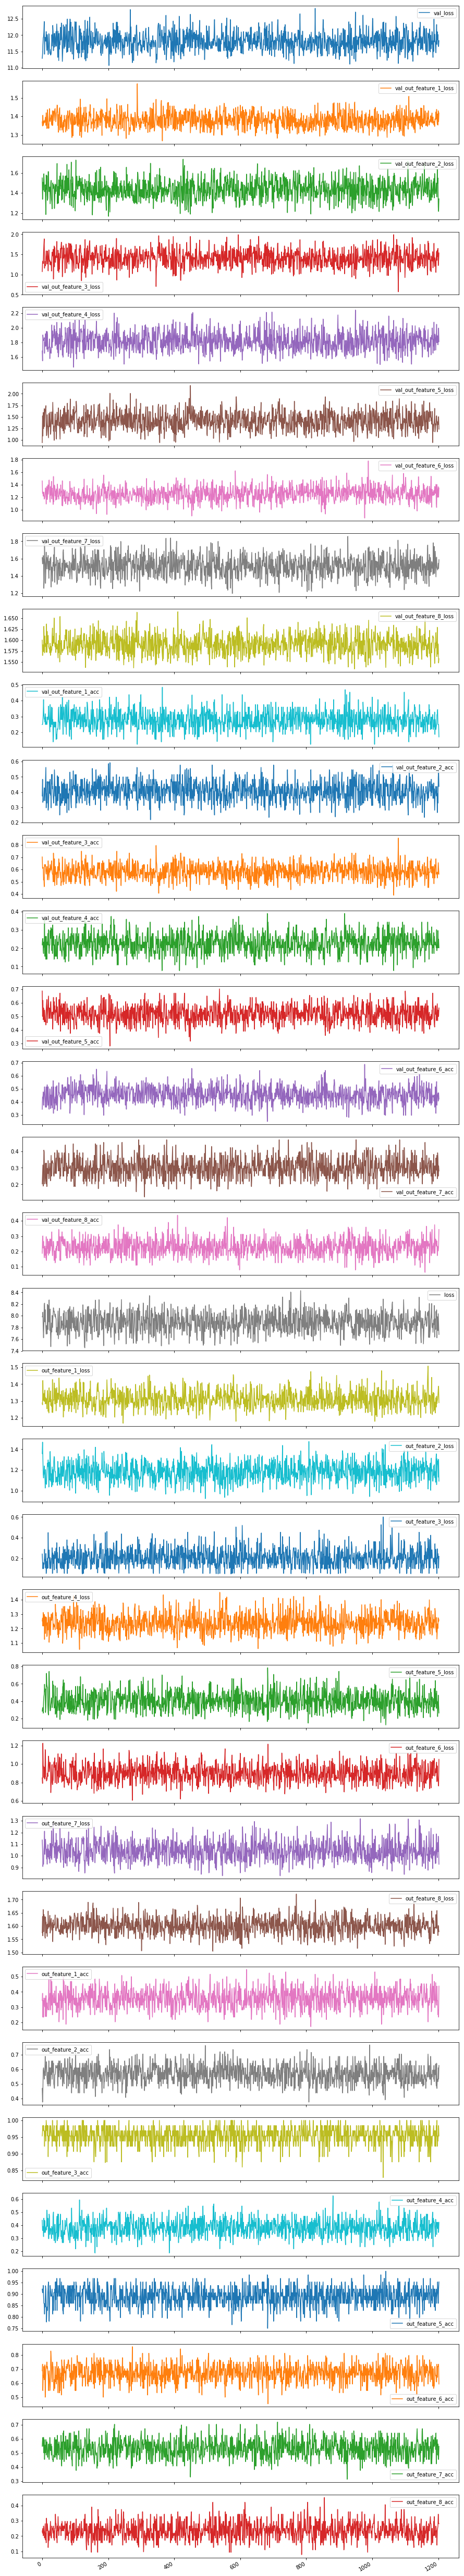

In [38]:
df_hist = pd.DataFrame(hist.history)
df_hist.plot(subplots=True, figsize=(15,100))
print(df_hist['val_loss'].min())
df_hist[df_hist['val_loss']<10.2]

In [39]:
# human_features.load_weights('human_features_weights_v2.h5')

In [40]:
# print(df_hist.columns)
print(df_hist['val_out_feature_1_acc'].max(), df_hist['val_out_feature_2_acc'].max(),
       df_hist['val_out_feature_3_acc'].max(), df_hist['val_out_feature_4_acc'].max(),
       df_hist['val_out_feature_5_acc'].max(), df_hist['val_out_feature_6_acc'].max(),
       df_hist['val_out_feature_7_acc'].max(), df_hist['val_out_feature_8_acc'].max())
# df_hist[df_hist['val_acc']>10.2]

0.484375 0.59375 0.8571428656578064 0.390625 0.703125 0.6875 0.46875 0.4375


(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)


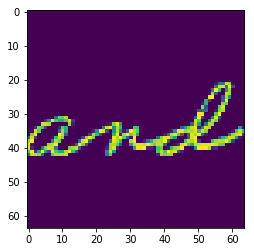

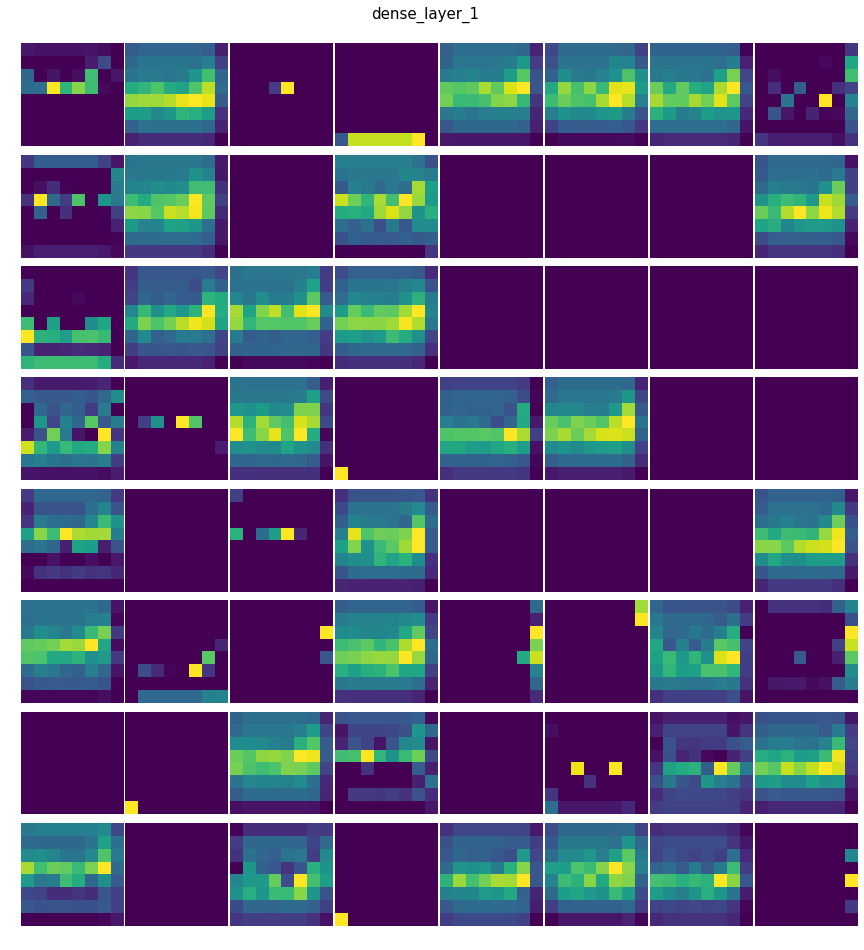

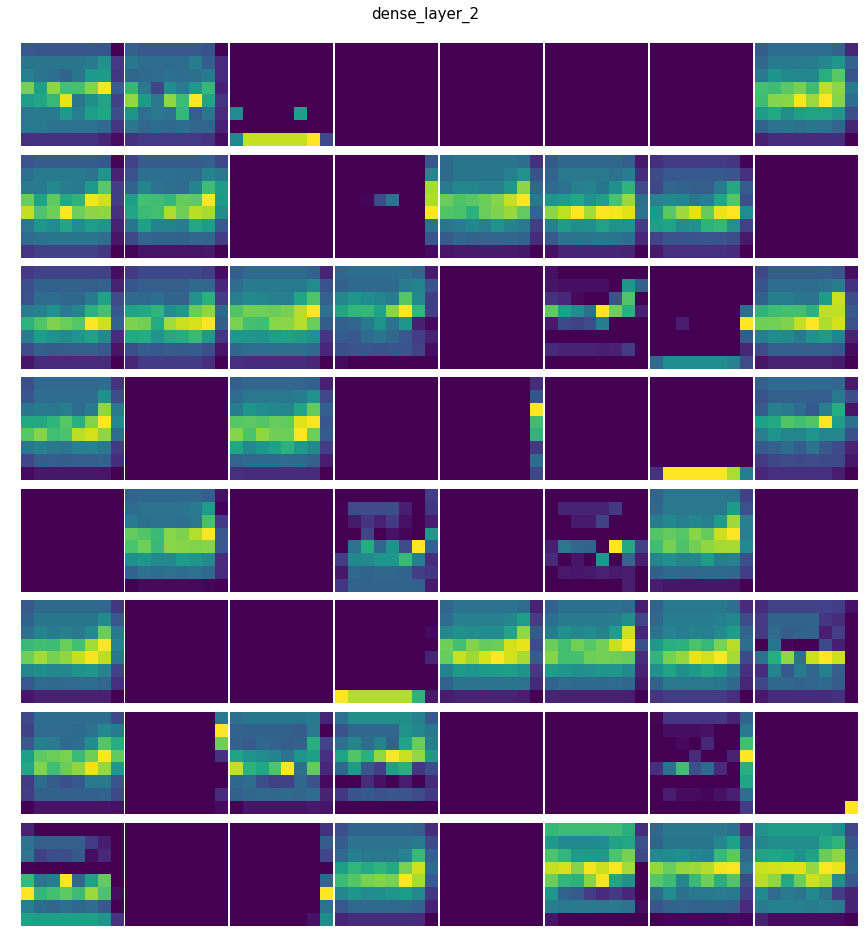

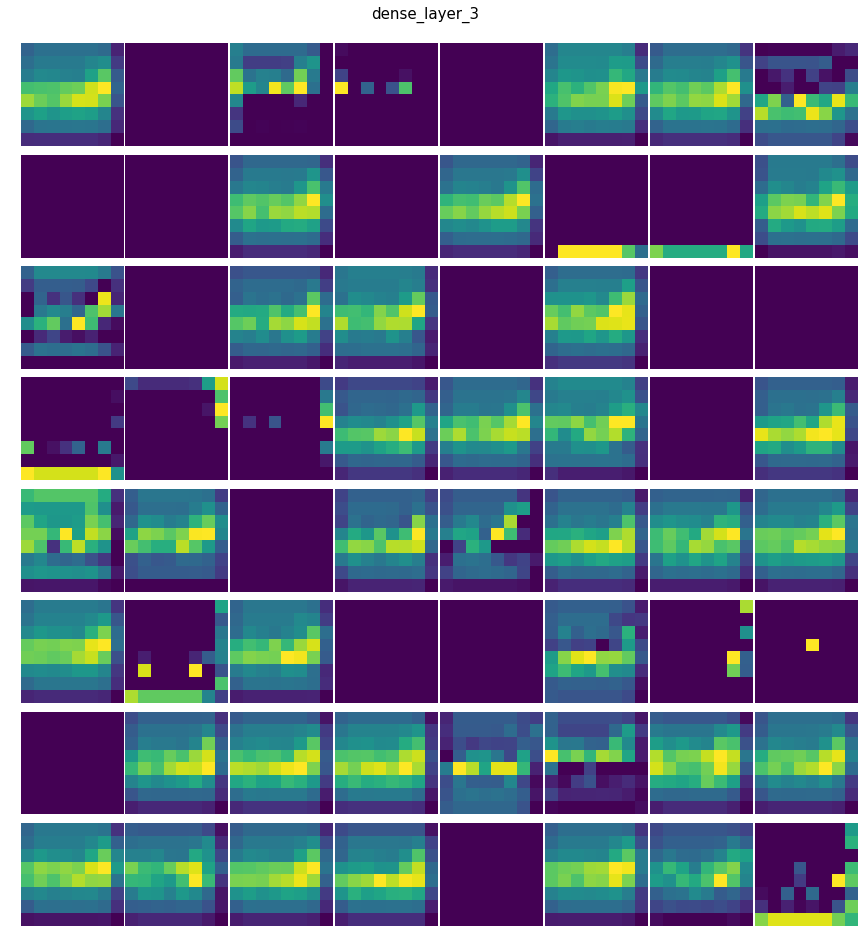

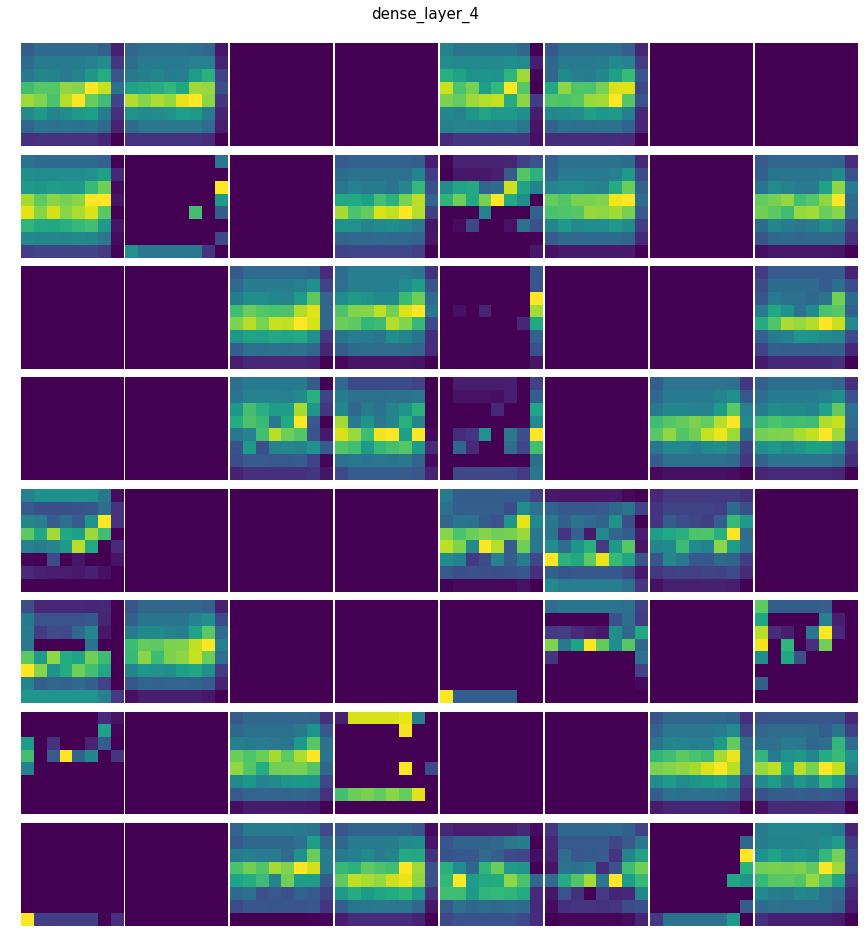

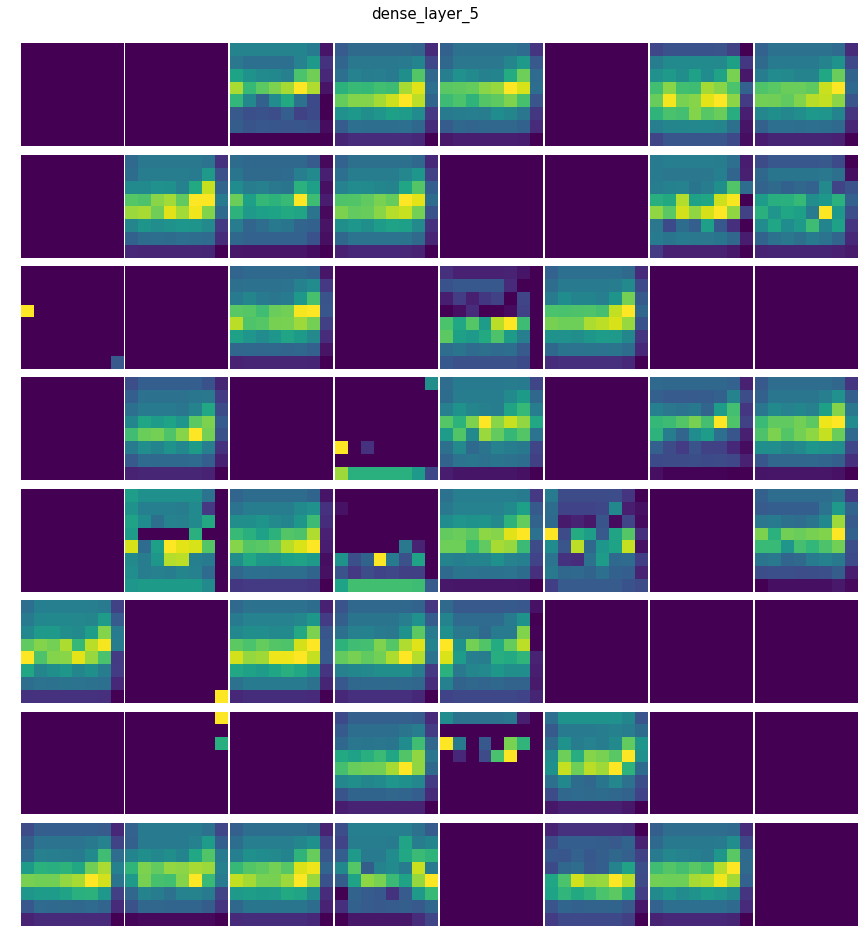

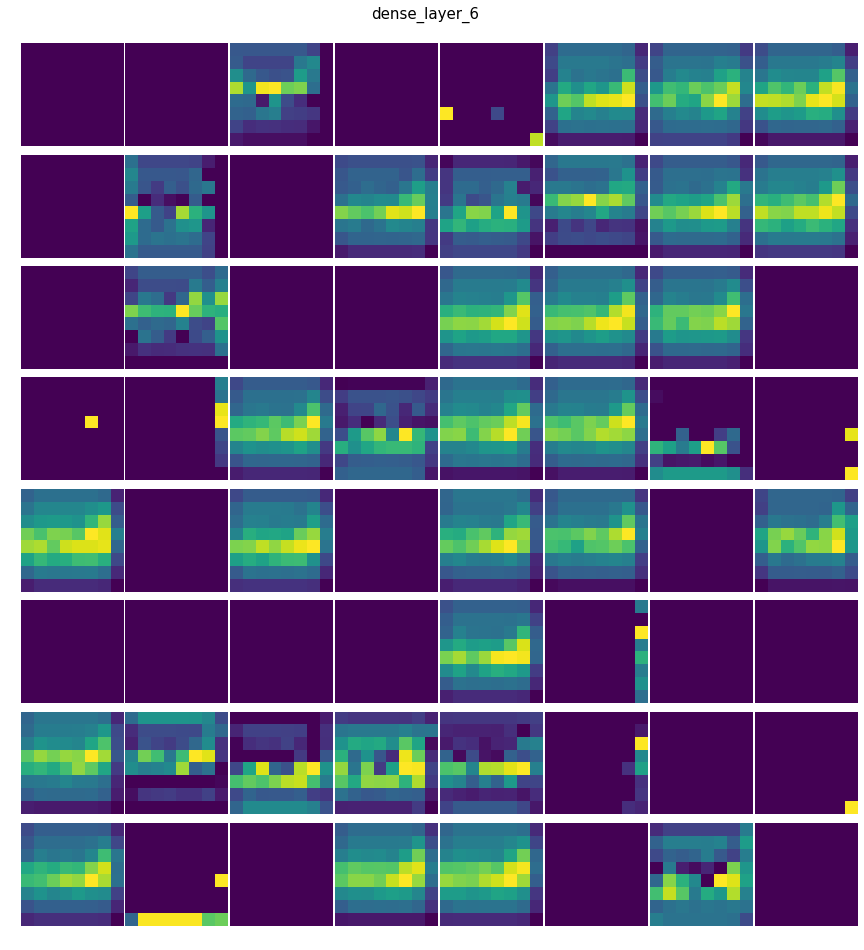

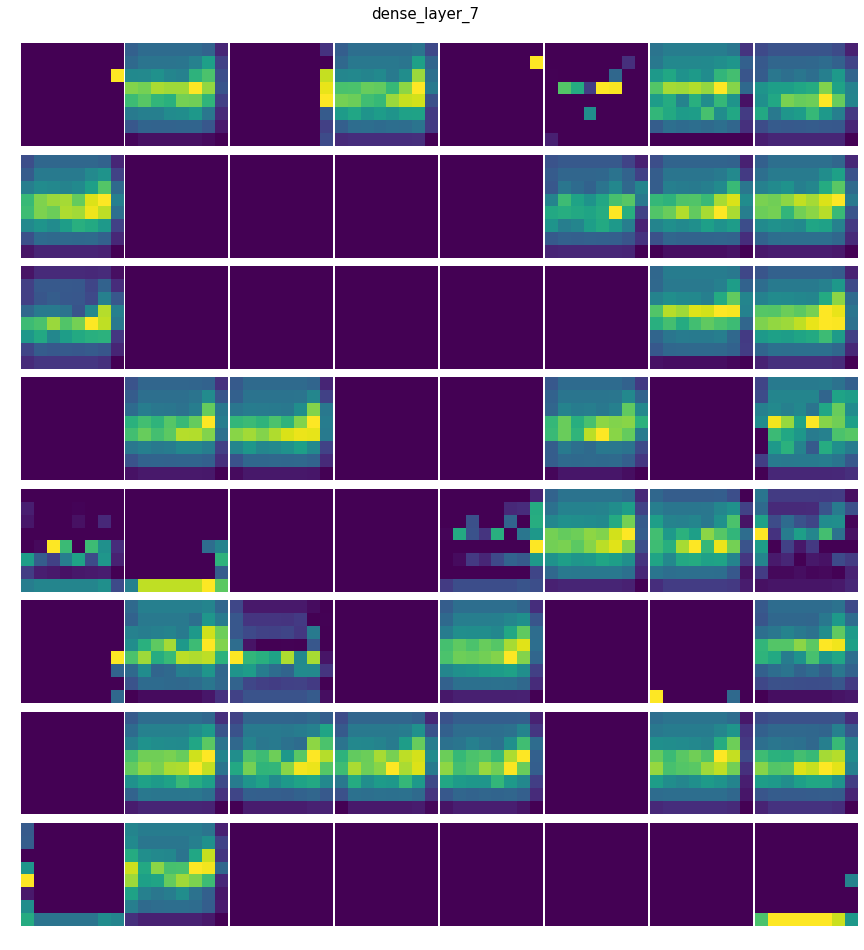

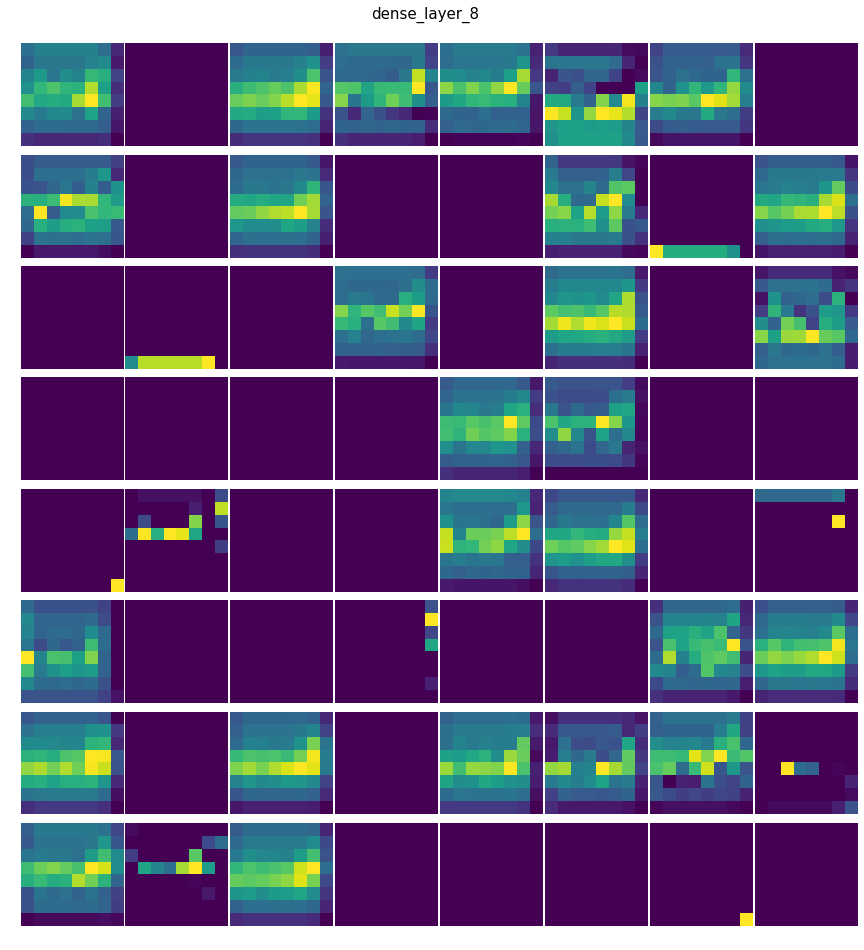

In [41]:
plt.imshow(inputs[10].reshape((64,64)))
plt.subplots_adjust(hspace = 0.1)
for i in range(1,9):
    visualize_model = Model(human_features.input, human_features.get_layer('dense_layer_'+str(i)).output)
    vis_out = visualize_model.predict(np.expand_dims(inputs[10],0))[0]
    vis_out = np.rollaxis(a=vis_out, start=0, axis=2)
    f,ax = plt.subplots(8,8)
    f.subplots_adjust(hspace = .00, wspace=.02, top=0.95)
    f.set_size_inches(15,15)
    f.suptitle('dense_layer_'+str(i), fontsize=15)
#     f.subplots_adjust(hspace = 0.1)
#     plt.title('dense_layer_'+str(i))
    print(vis_out.shape)
    for r in range(8):
        for c in range (8):
            ax[r,c].imshow(vis_out[c+r*8])
            ax[r,c].axis('off')
#     break

In [42]:
csv_data.var()

Unnamed: 0    87808.500000
f1                0.925845
f2                1.611160
f3                0.156296
f4                1.721574
f5                0.618530
f6                0.439478
f7                0.940941
f8                1.651763
f9                0.172465
dtype: float64